# STAT 306 Group Project #

## Introduction

The dataset we chose to conduct our analysis is the ‘Student Performance’ dataset obtained from the UC Irvine Machine Learning Repository.  It measures student achievement in secondary education across two Portuguese schools, Gabriel Pereira and Mousinho da Silveira, during the 2005-2006 school year. The dataset consists of 33 variables, including student grades, demographic information, and social and school-related factors, all collected from school reports and questionnaires. Two data files are included in the dataset, one for the subject of Math and one for Portuguese. We chose to focus on the file for ‘Math’, as our group consists of Math and Statistics students and this is more applicable to our fields of study.

Variables: 
- **sex**: Student's sex:  'F' (female) or 'M' (male).
- **age**: Student's age, ranging from 15 to 22. 
- **address**: Student's home address type: 'U' (urban) or 'R' (rural).
- **famsize**: Family size: 'LE3' (less or equal to 3) or 'GT3' (greater than 3).
- **Pstatus**: Parent's cohabitation status: T' (together) or 'A' (apart).
- **Medu**: Mother's education level, coded from 0 (none) to 4 (higher education).
- **Fedu**: Father's education level, coded from 0 (none) to 4 (higher education).
- **Mjob**: Mother's job, coded as 'teacher', 'health', 'services', 'at_home', or 'other'.
- **Fjob**: Father's job, coded as 'teacher', 'health', 'services', 'at_home', or 'other'.
- **reason**:Reasons to choose the school, coded as 'home', 'reputation', 'course', or 'other'.
- **guardian**: Student's guardian, coded as 'mother', 'father', or 'other'.
- **traveltime**: Home to school travel time, coded from 1 (<15 min) to 4 (>1 hour).
- **studytime**: Weekly study time, coded from 1 (<2 hours) to 4 (>10 hours).
- **failures**: Number of past class failures, coded from 0 (none) to 4 (4 or more).
- **school_support**: Extra educational support, coded as 'yes' or 'no'.
- **family_support**: Family educational support, coded as 'yes' or 'no'.
- **paid**: Extra paid classes within the course subject, coded as 'yes' or 'no'.
- **activities**: Participation in extracurricular activities, coded as 'yes' or 'no'.
- **nursery**: Attended nursery school, coded as 'yes' or 'no'.
- **higher**: Plans for higher education, coded as 'yes' or 'no'.
- **internet**: Home internet access, coded as 'yes' or 'no'.
- **romantic**:In a romantic relationship, coded as 'yes' or 'no'.
- **famrel**: Quality of family relationships, rated from 1 (very bad) to 5 (excellent).
- **freetime**: Free time after school, rated from 1 (very low) to 5 (very high).
- **goout**: Going out with friends, rated from 1 (very low) to 5 (very high).
- **Dalc**: Workday alcohol consumption, rated from 1 (very low) to 5 (very high).
- **Walc**: Weekend alcohol consumption, rated from 1 (very low) to 5 (very high).
- **health**: Current health status, rated from 1 (very bad) to 5 (very good).
- **absences**: Number of school absences, ranging from 0 to 93.
- **G3**: Final grade, ranging from 0 to 20 (output target).

Note: We have excluded the variables 'school' (name of school; included as part of background of data) and 'G1' and 'G2' (first and second period grade; G3 is a function of G1 and G2 so they are strongly correlated).

As students ourselves, naturally we are interested in understanding the factors that contribute to academic success, and how our backgrounds and choices influence our performance. As such, this dataset caught our eye, as it can provide insight into our own lives and our academic careers. This leads us to our research question:

<center>What external factors are associated with a student’s academic performance?</center>



In [1]:
# Import libraries
library(tidyverse)
library(dplyr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Read the dataset
data <- read.csv("student-mat.csv", header = TRUE, sep = ";")
#head(data)

In [3]:
# Wrangling the dataset
# data <- data |>
#     mutate(final_grade = G3, age = as.factor(age), Medu = as.factor(Medu), Fedu = as.factor(Fedu), traveltime = as.factor(traveltime), studytime = as.factor(studytime), 
#           failures = as.factor(failures), romantic = as.factor(romantic), famrel = as.factor(famrel), freetime = as.factor(freetime), goout = as.factor(goout), 
#            Dalc = as.factor(Dalc), Walc = as.factor(Walc), health = as.factor(health)) |>
#     select(-school, -G1, -G2, -G3)
# head(data)

# Wrangling the dataset
data <- data |>
    rename(final_grade = G3) |> # Rename G3 to final_grade
    select(-school, -G1, -G2)
#head(data)

# Filter the data to exclude rows where final_grade = 0
filtered_data <- data %>% filter(final_grade > 0)
head(filtered_data)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,⋯,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,final_grade
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,F,18,U,GT3,A,4,4,at_home,teacher,course,⋯,no,no,4,3,4,1,1,3,6,6
2,F,17,U,GT3,T,1,1,at_home,other,course,⋯,yes,no,5,3,3,1,1,3,4,6
3,F,15,U,LE3,T,1,1,at_home,other,other,⋯,yes,no,4,3,2,2,3,3,10,10
4,F,15,U,GT3,T,4,2,health,services,home,⋯,yes,yes,3,2,2,1,1,5,2,15
5,F,16,U,GT3,T,3,3,other,other,home,⋯,no,no,4,3,2,1,2,5,4,10
6,M,16,U,LE3,T,4,3,services,other,reputation,⋯,yes,no,5,4,2,1,2,5,10,15


In [4]:
sum(is.na(data))

[1] 0

## Exploratory Data Analysis

In [5]:
##VISUALIZATION

# Identify categorical and continuous variables
categorical_vars <- c("sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", 
                      "age", "Medu", "Fedu", "traveltime", "studytime", "failures", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health")
# continuous_vars <- c("age", "Medu", "Fedu", "traveltime", "studytime", "failures", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences")



# Choose a response variable (e.g., G3)
response_var <- "final_grade"

# Create boxplots for categorical variables
boxplots <- lapply(categorical_vars, function(var) {
  ggplot(data, aes_string(x = var, y = response_var)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle(paste("Boxplot of", response_var, "by", var))
})

# Combine all plots
all_plots <- c(boxplots)

scatterplot <- ggplot(data, aes(x = absences, y = final_grade)) +
    geom_point(alpha = 0.7) +
    ggtitle(paste("Scatterplot of", response_var, "vs absences"))


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


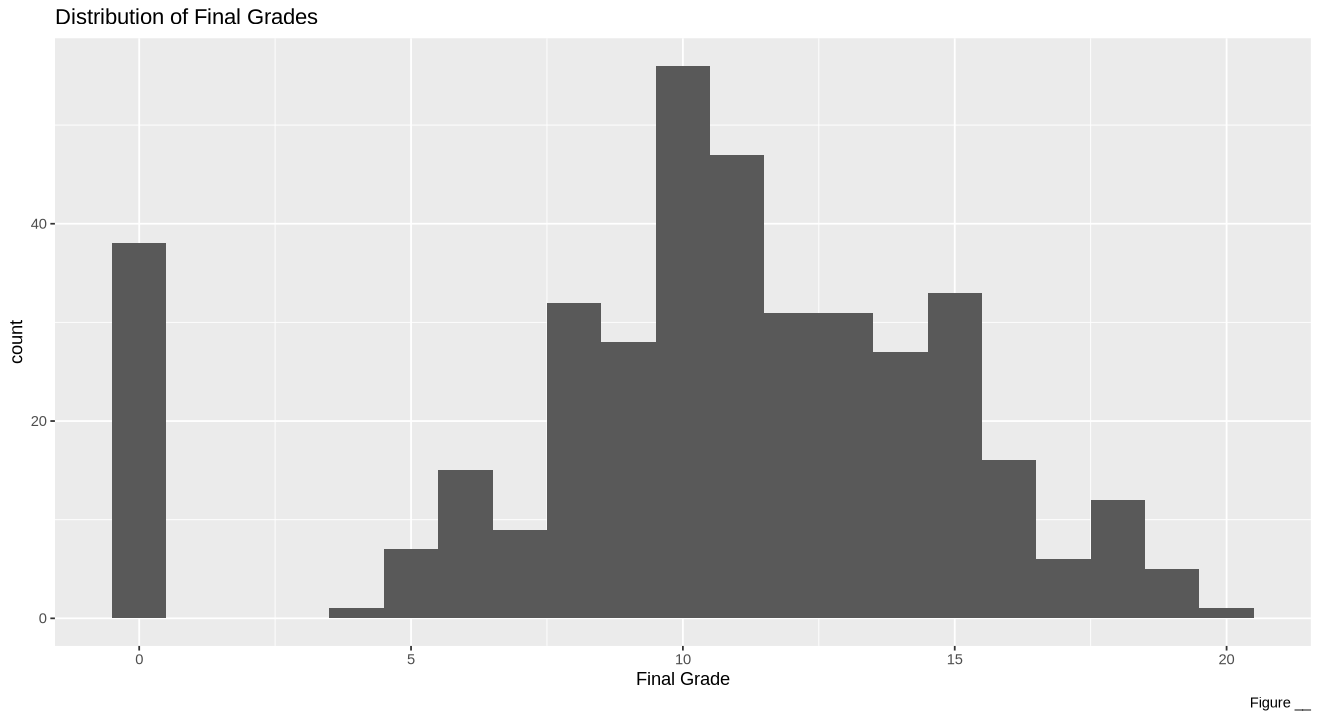

In [6]:
# Create a histogram to visualize the distribution of grades
options(repr.plot.width = 11, repr.plot.height = 6)
students_grade_dist <- data %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 1) + 
    labs(x = "Final Grade",
        title = "Distribution of Final Grades",
        caption = "Figure __") 
students_grade_dist

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


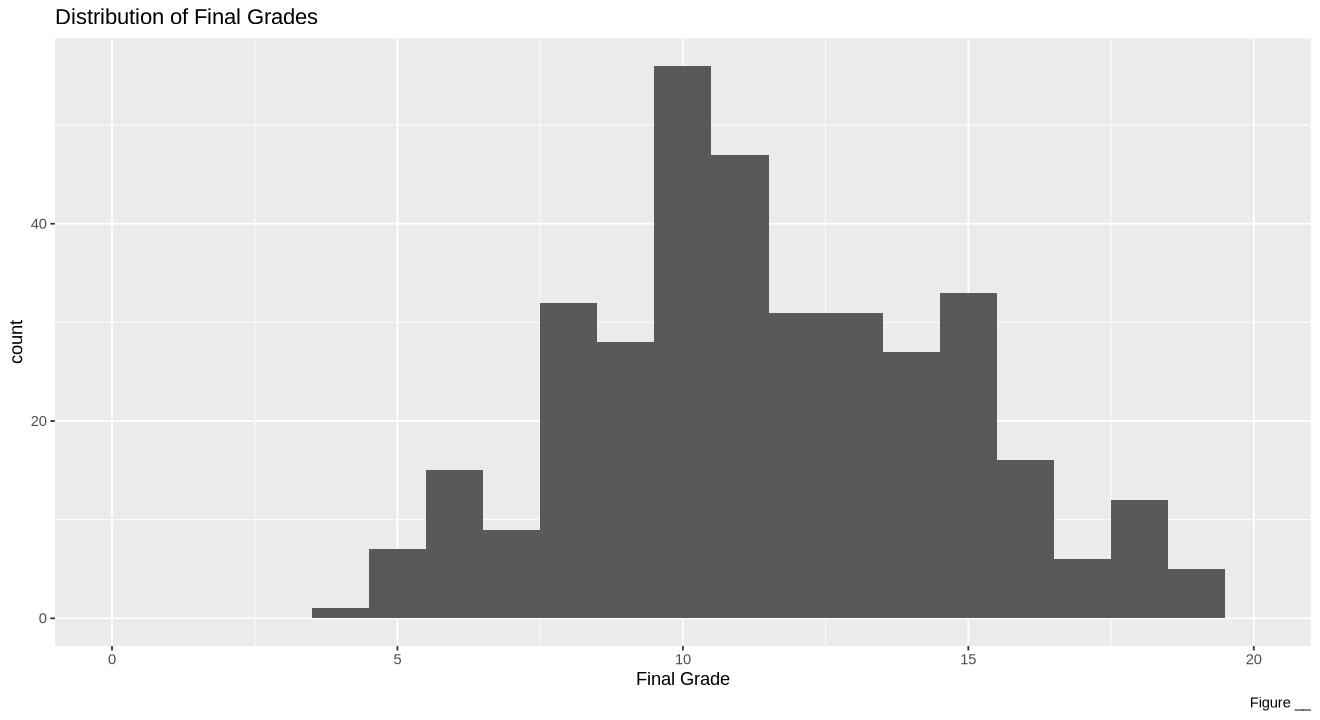

In [7]:
# Create a histogram to visualize the distribution of grades
options(repr.plot.width = 11, repr.plot.height = 6)
students_grade_dist_new <- data %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 1) + 
    scale_x_continuous(limits = c(0,20)) +
    labs(x = "Final Grade",
        title = "Distribution of Final Grades",
        caption = "Figure __") 
students_grade_dist_new

## Fitting Linear Model: Multiple Linear Regression

In [8]:
data_selected <- data |>
    select(-famsize, -Pstatus, -reason, -famsup, -paid, -activities, -nursery, -romantic, -absences)

filtered_data <- data_selected %>%
  filter(final_grade != 0)

#filtered_data$final_grade
#log(data_selected$final_grade)
#data_selected$final_grade

linear_model <- lm(final_grade ~. , data = filtered_data)
summary <- summary(linear_model)
summary


Call:
lm(formula = final_grade ~ ., data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8079 -1.8833 -0.1467  1.8142  7.3336 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    16.247026   3.099737   5.241 2.85e-07 ***
sexM            0.891723   0.342971   2.600 0.009743 ** 
age            -0.283129   0.145005  -1.953 0.051721 .  
addressU        0.499867   0.401267   1.246 0.213752    
Medu            0.049563   0.223392   0.222 0.824558    
Fedu            0.098209   0.195567   0.502 0.615882    
Mjobhealth      1.341178   0.795669   1.686 0.092821 .  
Mjobother      -0.373530   0.523551  -0.713 0.476070    
Mjobservices    0.904500   0.584606   1.547 0.122777    
Mjobteacher    -0.610941   0.741913  -0.823 0.410839    
Fjobhealth     -0.866157   1.013623  -0.855 0.393441    
Fjobother      -0.807027   0.747956  -1.079 0.281388    
Fjobservices   -0.828518   0.775951  -1.068 0.286418    
Fjobteacher     1.209382   0.93494

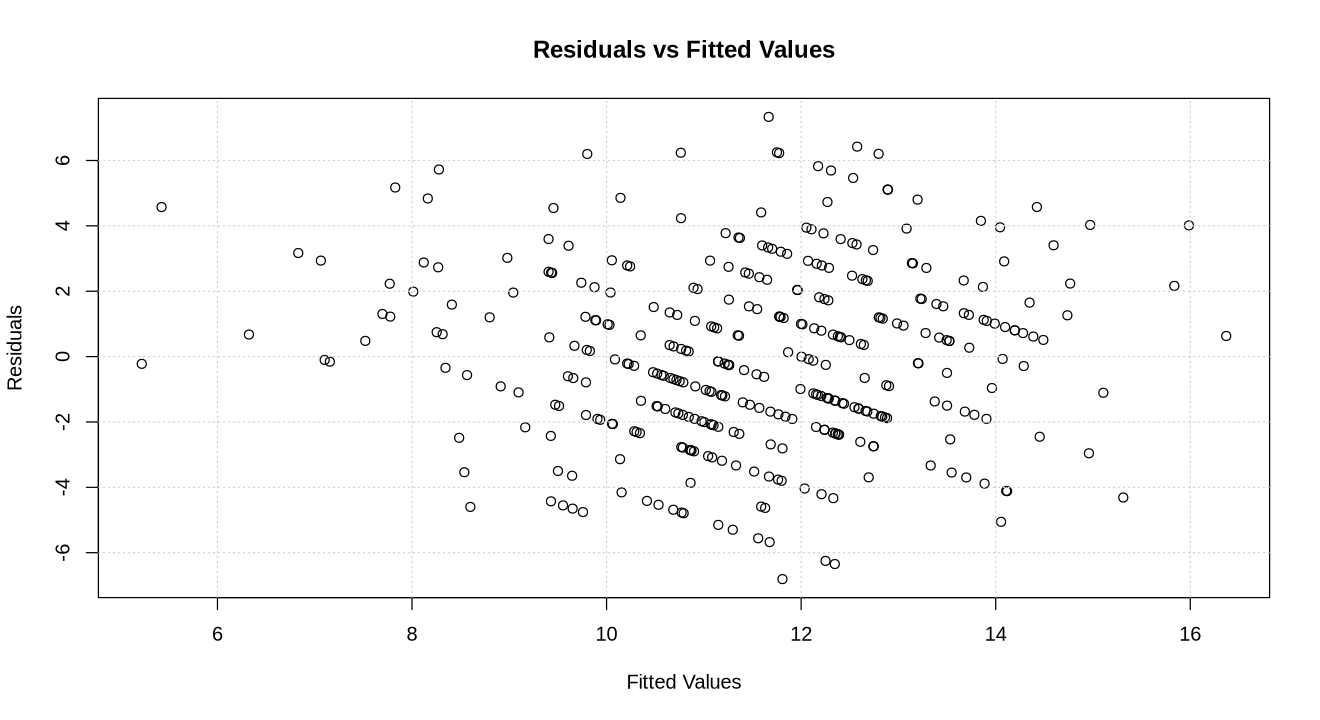

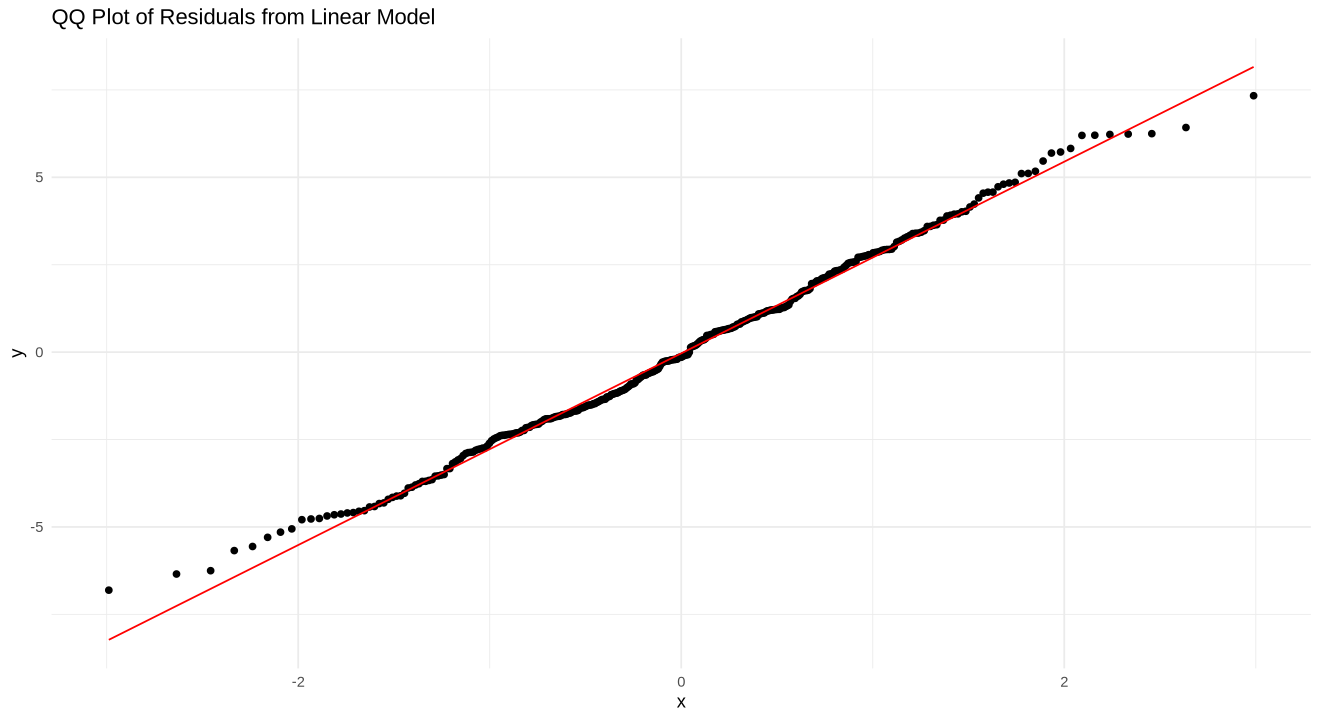

In [9]:
plot(linear_model$fitted.values, linear_model$residuals,
     xlab = "Fitted Values",
     ylab = "Residuals",
     main = "Residuals vs Fitted Values")
grid()

library(ggplot2)
residuals_df <- data.frame(Residuals = residuals(linear_model))
ggplot(residuals_df, aes(sample=Residuals)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  ggtitle("QQ Plot of Residuals from Linear Model") +
  theme_minimal()

## Analysis : Best Subset Selection

In [10]:
options(repos = c(CRAN = "https://cran.r-project.org"))
#install.packages("leaps")
library(leaps)
#install.packages("dplyr")
library(dplyr)
#setting seed
set.seed(3755)

# apply best selection on dataset
best_selection <- regsubsets(
  x =  final_grade ~ ., nvmax = 26 ,
  data = filtered_data,
  method = "exhaustive"
)

best_selection_summary <- summary(best_selection)
best_selection_summary

Subset selection object
Call: regsubsets.formula(x = final_grade ~ ., nvmax = 26, data = filtered_data, 
    method = "exhaustive")
27 Variables  (and intercept)
               Forced in Forced out
sexM               FALSE      FALSE
age                FALSE      FALSE
addressU           FALSE      FALSE
Medu               FALSE      FALSE
Fedu               FALSE      FALSE
Mjobhealth         FALSE      FALSE
Mjobother          FALSE      FALSE
Mjobservices       FALSE      FALSE
Mjobteacher        FALSE      FALSE
Fjobhealth         FALSE      FALSE
Fjobother          FALSE      FALSE
Fjobservices       FALSE      FALSE
Fjobteacher        FALSE      FALSE
guardianmother     FALSE      FALSE
guardianother      FALSE      FALSE
traveltime         FALSE      FALSE
studytime          FALSE      FALSE
failures           FALSE      FALSE
schoolsupyes       FALSE      FALSE
higheryes          FALSE      FALSE
internetyes        FALSE      FALSE
famrel             FALSE      FALSE
freetime  

In [11]:
# best selection summary table
n_vars <- length(best_selection_summary$rsq)

best_selection_summary_df <- tibble(
    n_input_variables = 1:n_vars,
    RSQ = best_selection_summary$rsq,
    ADJ.R2 = best_selection_summary$adjr2,
    Cp = best_selection_summary$cp,
)

best_selection_summary_df

n_input_variables,RSQ,ADJ.R2,Cp
<int>,<dbl>,<dbl>,<dbl>
1,0.0863366,0.0837629,74.853903
2,0.1376316,0.1327595,52.833266
3,0.1651606,0.1580656,41.941912
4,0.1877458,0.1785156,33.365613
5,0.2074541,0.1961643,26.136507
6,0.2310119,0.2178292,17.104792
7,0.2428399,0.2276534,13.565898
8,0.2547166,0.2375837,10.004246
9,0.2672009,0.2481946,6.158043


In [12]:
#which.max(best_selection_summary_df$ADJ.R2)

In [ ]:
#filtered_data <- filtered_data %>%
#  filter(Mjob == "health")

library(dplyr)

# Set undesired levels to NA
final_filtered_data <- filtered_data %>%

  mutate(Mjob = ifelse(Mjob %in% c("other"), NA, Mjob),
         Fjob = ifelse(Fjob %in% c("health", "other", "services"), NA, Fjob))

# Drop unused levels
#filtered_data$Mjob <- droplevels(filtered_data$Mjob)
#filtered_data$Fjob <- droplevels(filtered_data$Fjob)

# Check the levels after modification
levels(filtered_data$Mjob)
levels(filtered_data$Fjob)

# Fit the linear model without having to exclude levels explicitly in the formula
reduced_linear_model <- lm(final_grade ~ sex + Mjob + Fjob + studytime + failures + schoolsup + goout, 
            data = filtered_data
                          )

summary(reduced_linear_model)

# Analysis: Logistic Regression

In [ ]:
binary_data <- data_selected %>%
  mutate(pass_fail = ifelse(final_grade >= 10, 1, 0))

logistic_model <- glm(pass_fail ~ .-final_grade,                      
                      data = binary_data,
                      family = binomial)

summary(logistic_model)

In [ ]:
# Calculating deviance and AIC of the logistic model
aic <- AIC(logistic_model)
deviance <- deviance(logistic_model)

print(paste("Calculated AIC:", aic))
print(paste("Calculated Deviance:", deviance))

In [ ]:
# Calculating deviance and AIC of the standardized logistic model
binary_data_scaled <- binary_data %>%
  mutate(across(where(is.numeric), ~ scale(.), .names = "scaled{.col}")) %>%
  select(-final_grade) 

logistic_model_scaled <- glm(pass_fail ~ .,
                             data = binary_data_scaled,
                             family = binomial)

scaled_model_aic <- AIC(logistic_model_scaled)
scaled_model_deviance <- deviance(logistic_model_scaled)

print(paste("Calculated AIC for Standardized Model:", scaled_model_aic))
print(paste("Calculated Deviance for Standarized Model:", scaled_model_deviance))

In [ ]:
# AIC and Deviance for null model
null_model <- glm(pass_fail ~ 1,
                      data = binary_data,
                      family = binomial)

AIC(null_model)
deviance(null_model)

In [ ]:
# VIF for linear and logistic models

library(car)
vif(logistic_model)
vif(linear_model)

## Conclusion

## Appendix

## References